<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/ET_Gradient_Boosting(Part_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
data = {
    "IQ": [95,100,105,110,115,120,125,130,135,140,
           90,85,150,145,98,102,108,112,118,122],

    "CGPA": [6.5,6.8,7.0,7.2,7.5,7.8,8.0,8.2,8.5,8.8,
             6.0,5.8,9.0,8.9,6.7,6.9,7.1,7.4,7.6,7.9],

    "Salary": [3.2,3.8,4.2,4.8,5.5,6.2,7.0,7.8,8.9,10.2,
               2.8,2.5,12.5,11.3,3.5,4.0,4.5,5.0,5.8,6.5]
}

df = pd.DataFrame(data)

In [113]:
from sklearn.ensemble import GradientBoostingRegressor

# Features and target
X = df[['IQ', 'CGPA']]
y = df['Salary']

# Model
model = GradientBoostingRegressor()
model.fit(X, y)

# Predictions
df['pred1'] = model.predict(X)


In [114]:
df['error'] = df['Salary'] - df['pred1']


In [115]:
print(df)


     IQ  CGPA  Salary      pred1     error
0    95   6.5     3.2   3.200093 -0.000093
1   100   6.8     3.8   3.800065 -0.000065
2   105   7.0     4.2   4.200047 -0.000047
3   110   7.2     4.8   4.800025 -0.000025
4   115   7.5     5.5   5.500001 -0.000001
5   120   7.8     6.2   6.199980  0.000020
6   125   8.0     7.0   6.999957  0.000043
7   130   8.2     7.8   7.799944  0.000056
8   135   8.5     8.9   8.899918  0.000082
9   140   8.8    10.2  10.199891  0.000109
10   90   6.0     2.8   2.800127 -0.000127
11   85   5.8     2.5   2.500180 -0.000180
12  150   9.0    12.5  12.499787  0.000213
13  145   8.9    11.3  11.299838  0.000162
14   98   6.7     3.5   3.500079 -0.000079
15  102   6.9     4.0   4.000060 -0.000060
16  108   7.1     4.5   4.500035 -0.000035
17  112   7.4     5.0   5.000011 -0.000011
18  118   7.6     5.8   5.799990  0.000010
19  122   7.9     6.5   6.499973  0.000027


In [116]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X, df['error'])


DecisionTreeRegressor(max_depth=2)

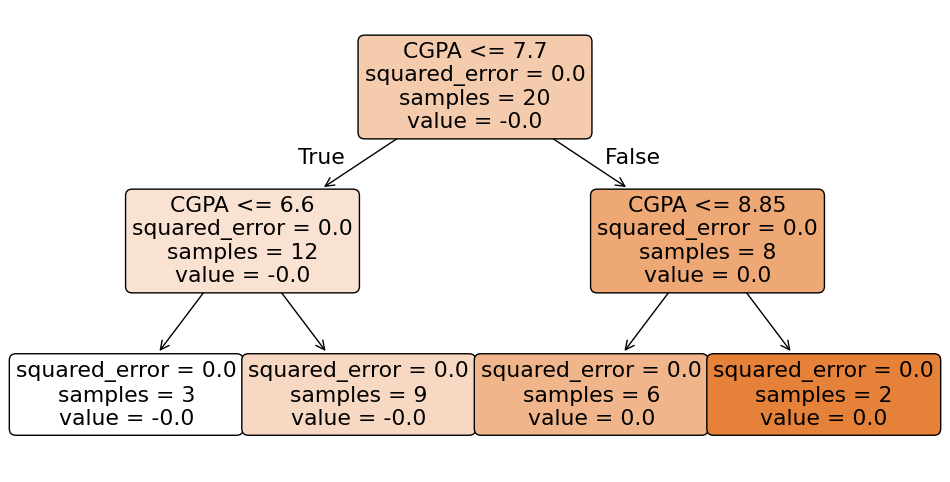

In [117]:
plt.figure(figsize=(12,6))
plot_tree(tree,
          feature_names=['IQ', 'CGPA'],
          filled=True,
          rounded=True)
plt.show()


In [118]:
learning_rate = 0.1

df['pred2'] = df['pred1'] + learning_rate * tree.predict(X)

# New error
df['error2'] = df['Salary'] - df['pred2']


In [119]:
df

,IQ,CGPA,Salary,pred1,error,pred2,error2
0,95,6.5,3.2,3.200093,-0.000093,3.200079,-0.000079
1,100,6.8,3.8,3.800065,-0.000065,3.800061,-0.000061
2,105,7.0,4.2,4.200047,-0.000047,4.200044,-0.000044
3,110,7.2,4.8,4.800025,-0.000025,4.800021,-0.000021
4,115,7.5,5.5,5.500001,-0.000001,5.499998,0.000002
5,120,7.8,6.2,6.199980,0.000020,6.199985,0.000015
6,125,8.0,7.0,6.999957,0.000043,6.999963,0.000037
7,130,8.2,7.8,7.799944,0.000056,7.799949,0.000051
8,135,8.5,8.9,8.899918,0.000082,8.899924,0.000076
9,140,8.8,10.2,10.199891,0.000109,10.199897,0.000103


In [120]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X, df['error2'])


DecisionTreeRegressor(max_depth=2)

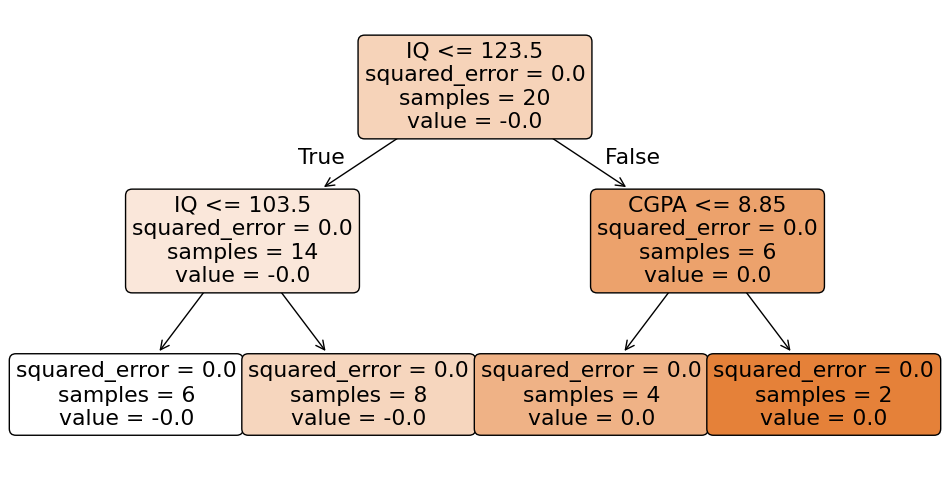

In [121]:
plt.figure(figsize=(12,6))
plot_tree(tree,
          feature_names=['IQ', 'CGPA'],
          filled=True,
          rounded=True)
plt.show()


In [122]:
df

,IQ,CGPA,Salary,pred1,error,pred2,error2
0,95,6.5,3.2,3.200093,-0.000093,3.200079,-0.000079
1,100,6.8,3.8,3.800065,-0.000065,3.800061,-0.000061
2,105,7.0,4.2,4.200047,-0.000047,4.200044,-0.000044
3,110,7.2,4.8,4.800025,-0.000025,4.800021,-0.000021
4,115,7.5,5.5,5.500001,-0.000001,5.499998,0.000002
5,120,7.8,6.2,6.199980,0.000020,6.199985,0.000015
6,125,8.0,7.0,6.999957,0.000043,6.999963,0.000037
7,130,8.2,7.8,7.799944,0.000056,7.799949,0.000051
8,135,8.5,8.9,8.899918,0.000082,8.899924,0.000076
9,140,8.8,10.2,10.199891,0.000109,10.199897,0.000103


In [123]:
# Model 1 prediction (mean)
df['pred_model1'] = y.mean()


In [124]:
# Residuals from Model 1
df['error1'] = y - df['pred_model1']

# Train tree on residuals
tree1 = DecisionTreeRegressor(max_depth=2)
tree1.fit(X, df['error1'])


DecisionTreeRegressor(max_depth=2)

In [125]:
learning_rate = 0.1

df['pred_model2'] = df['pred_model1'] + learning_rate * tree1.predict(X)


In [126]:
df['error_model1'] = y - df['pred_model1']
df['error_model2'] = y - df['pred_model2']

print(df[['IQ','CGPA','Salary','pred_model1','pred_model2',
          'error_model1','error_model2']])


     IQ  CGPA  Salary  pred_model1  pred_model2  error_model1  error_model2
0    95   6.5     3.2          6.0     5.756250          -2.8     -2.556250
1   100   6.8     3.8          6.0     5.756250          -2.2     -1.956250
2   105   7.0     4.2          6.0     5.756250          -1.8     -1.556250
3   110   7.2     4.8          6.0     5.982857          -1.2     -1.182857
4   115   7.5     5.5          6.0     5.982857          -0.5     -0.482857
5   120   7.8     6.2          6.0     5.982857           0.2      0.217143
6   125   8.0     7.0          6.0     5.982857           1.0      1.017143
7   130   8.2     7.8          6.0     6.235000           1.8      1.565000
8   135   8.5     8.9          6.0     6.235000           2.9      2.665000
9   140   8.8    10.2          6.0     6.533333           4.2      3.666667
10   90   6.0     2.8          6.0     5.756250          -3.2     -2.956250
11   85   5.8     2.5          6.0     5.756250          -3.5     -3.256250
12  150   9.

In [127]:
new_data = [[110, 7.5]]

# Model 1 prediction
pred1 = y.mean()

# Model 2 prediction
pred2 = pred1 + learning_rate * tree1.predict(new_data)

print("Model 1 Prediction:", pred1)
print("Model 2 Prediction:", pred2[0])


Model 1 Prediction: 6.0
Model 2 Prediction: 5.982857142857143


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [128]:
df['error2'] = y - df['pred_model2']


In [129]:
from sklearn.tree import DecisionTreeRegressor

tree2 = DecisionTreeRegressor(max_depth=2)
tree2.fit(X, df['error2'])


DecisionTreeRegressor(max_depth=2)

In [130]:
learning_rate = 0.1

df['pred_model3'] = df['pred_model2'] + learning_rate * tree2.predict(X)


In [131]:
from sklearn.metrics import mean_squared_error

mse1 = mean_squared_error(y, df['pred_model1'])
mse2 = mean_squared_error(y, df['pred_model2'])
mse3 = mean_squared_error(y, df['pred_model3'])

print("Model 1 MSE:", mse1)
print("Model 2 MSE:", mse2)
print("Model 3 MSE:", mse3)


Model 1 MSE: 7.727999999999999
Model 2 MSE: 6.358904672619047
Model 3 MSE: 5.242705043658352


In [132]:
learning_rate = 0.1

# Model 1 (mean)
df['pred1'] = y.mean()

# Tree 1
residual1 = y - df['pred1']
tree1 = DecisionTreeRegressor(max_depth=2)
tree1.fit(X, residual1)
df['pred2'] = df['pred1'] + learning_rate * tree1.predict(X)

# Tree 2
residual2 = y - df['pred2']
tree2 = DecisionTreeRegressor(max_depth=2)
tree2.fit(X, residual2)
df['pred3'] = df['pred2'] + learning_rate * tree2.predict(X)

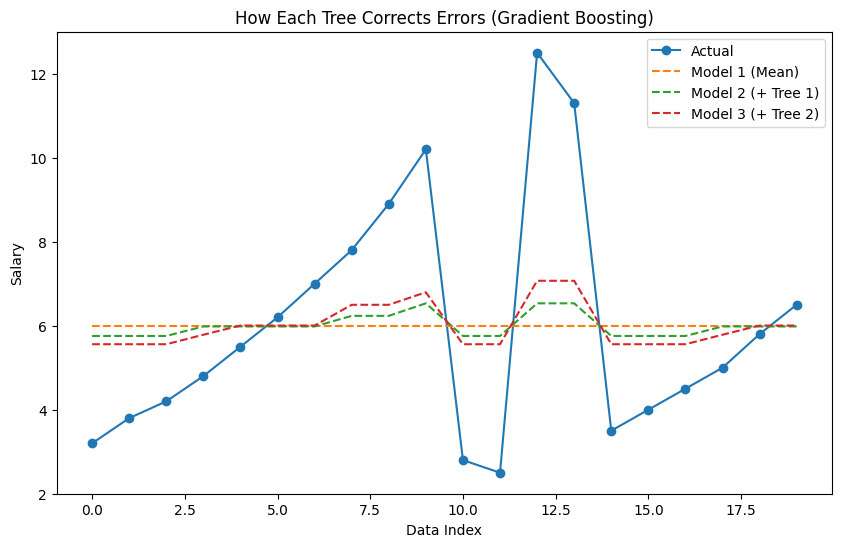

In [133]:
plt.figure(figsize=(10,6))

plt.plot(y.values, label="Actual", marker='o')
plt.plot(df['pred1'], label="Model 1 (Mean)", linestyle='--')
plt.plot(df['pred2'], label="Model 2 (+ Tree 1)", linestyle='--')
plt.plot(df['pred3'], label="Model 3 (+ Tree 2)", linestyle='--')

plt.xlabel("Data Index")
plt.ylabel("Salary")
plt.title("How Each Tree Corrects Errors (Gradient Boosting)")
plt.legend()
plt.show()


In [134]:
from sklearn.metrics import mean_squared_error

mse1 = mean_squared_error(y, df['pred1'])
mse2 = mean_squared_error(y, df['pred2'])
mse3 = mean_squared_error(y, df['pred3'])

print("MSE Model 1:", mse1)
print("MSE Model 2:", mse2)
print("MSE Model 3:", mse3)


MSE Model 1: 7.727999999999999
MSE Model 2: 6.358904672619047
MSE Model 3: 5.242705043658352


#: Model 1 Prediction (Mean)

In [135]:
new_student = [[110, 7.5]]

# Model 1 (mean)
pred1_new = y.mean()
print("Model 1 Prediction:", pred1_new)


Model 1 Prediction: 6.0


#Model 2 Prediction (After Tree 1)

In [136]:
learning_rate = 0.1

pred2_new = pred1_new + learning_rate * tree1.predict(new_student)
print("Model 2 Prediction:", pred2_new[0])


Model 2 Prediction: 5.982857142857143


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [137]:
pred3_new = pred2_new + learning_rate * tree2.predict(new_student)
print("Model 3 Prediction:", pred3_new[0])


Model 3 Prediction: 6.0045714285714284


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [138]:
new_student = [[110, 7.5]]

learning_rate = 0.1

# Model 1
pred1_new = y.mean()

# Model 2
pred2_new = pred1_new + learning_rate * tree1.predict(new_student)

# Model 3
pred3_new = pred2_new + learning_rate * tree2.predict(new_student)

print("Predictions for New Student (IQ=110, CGPA=7.5)")
print("Model 1:", pred1_new)
print("Model 2:", pred2_new[0])
print("Model 3:", pred3_new[0])


Predictions for New Student (IQ=110, CGPA=7.5)
Model 1: 6.0
Model 2: 5.982857142857143
Model 3: 6.0045714285714284


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [139]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

learning_rate = 0.1
n_trees = 10

# Initial prediction
pred = np.full(len(y), y.mean())

trees = []

for i in range(n_trees):
    residual = y - pred
    tree = DecisionTreeRegressor(max_depth=2)
    tree.fit(X, residual)

    pred = pred + learning_rate * tree.predict(X)
    trees.append(tree)


In [140]:
new_student = [[110, 7.5]]

# Start with mean
final_pred = y.mean()

# Add corrections from all trees
for tree in trees:
    final_pred += learning_rate * tree.predict(new_student)[0]

print("Final Predicted Salary:", final_pred)


Final Predicted Salary: 5.400034594226859


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/

In [141]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

X = df[['IQ', 'CGPA']]
y = df['Salary']

# Initial prediction (mean)
pred = np.full(len(y), y.mean())

learning_rate = 0.1
n_trees = 10

errors = []

for i in range(n_trees):

    # Step 1: residual
    residual = y - pred

    # Step 2: train tree on residual
    tree = DecisionTreeRegressor(max_depth=2)
    tree.fit(X, residual)

    # Step 3: update prediction
    pred = pred + learning_rate * tree.predict(X)

    # Step 4: calculate error
    mse = mean_squared_error(y, pred)
    errors.append(mse)

    print(f"Tree {i+1} | MSE: {mse}")


Tree 1 | MSE: 6.358904672619047
Tree 2 | MSE: 5.242705043658352
Tree 3 | MSE: 4.31951507731909
Tree 4 | MSE: 3.5691334014831506
Tree 5 | MSE: 2.948962233684443
Tree 6 | MSE: 2.4458783022776176
Tree 7 | MSE: 2.021176875113218
Tree 8 | MSE: 1.6734539567873958
Tree 9 | MSE: 1.3828070311297354
Tree 10 | MSE: 1.1463543946933201


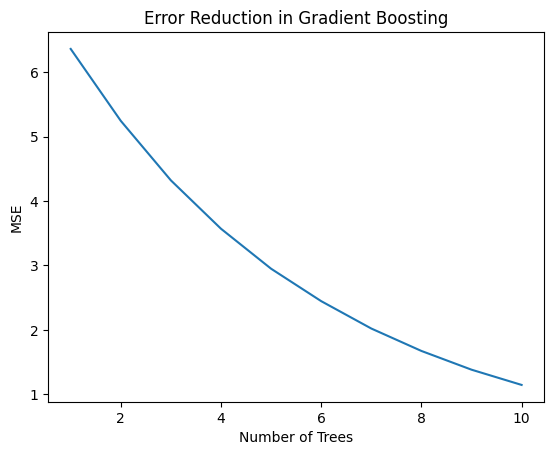

In [142]:
import matplotlib.pyplot as plt

plt.plot(range(1, n_trees+1), errors)
plt.xlabel("Number of Trees")
plt.ylabel("MSE")
plt.title("Error Reduction in Gradient Boosting")
plt.show()


In [143]:
df

,IQ,CGPA,Salary,pred1,error,pred2,error2,pred_model1,error1,pred_model2,error_model1,error_model2,pred_model3,pred3
0,95,6.5,3.2,6.0,-0.000093,5.756250,-2.556250,6.0,-2.8,5.756250,-2.8,-2.556250,5.559093,5.559093
1,100,6.8,3.8,6.0,-0.000065,5.756250,-1.956250,6.0,-2.2,5.756250,-2.2,-1.956250,5.559093,5.559093
2,105,7.0,4.2,6.0,-0.000047,5.756250,-1.556250,6.0,-1.8,5.756250,-1.8,-1.556250,5.559093,5.559093
3,110,7.2,4.8,6.0,-0.000025,5.982857,-1.182857,6.0,-1.2,5.982857,-1.2,-1.182857,5.785700,5.785700
4,115,7.5,5.5,6.0,-0.000001,5.982857,-0.482857,6.0,-0.5,5.982857,-0.5,-0.482857,6.004571,6.004571
5,120,7.8,6.2,6.0,0.000020,5.982857,0.217143,6.0,0.2,5.982857,0.2,0.217143,6.004571,6.004571
6,125,8.0,7.0,6.0,0.000043,5.982857,1.017143,6.0,1.0,5.982857,1.0,1.017143,6.004571,6.004571
7,130,8.2,7.8,6.0,0.000056,6.235000,1.565000,6.0,1.8,6.235000,1.8,1.565000,6.498222,6.498222
8,135,8.5,8.9,6.0,0.000082,6.235000,2.665000,6.0,2.9,6.235000,2.9,2.665000,6.498222,6.498222
9,140,8.8,10.2,6.0,0.000109,6.533333,3.666667,6.0,4.2,6.533333,4.2,3.666667,6.796556,6.796556
